# Baixando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Bibliotecas do Scikit-learn ---
# Pré-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Redução de Dimensionalidade e Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Divisão dos dados
from sklearn.model_selection import train_test_split

# Modelos de Detecção de Anomalia
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Métricas de Avaliação
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

# substituir NAN pela media
from sklearn.impute import SimpleImputer

In [3]:
# Importando as bibliotecas necessárias
from google.colab import drive
import pandas as pd

# Montando o Google Drive no ambiente do Colab
# Uma janela de autorização aparecerá para você clicar no link,
# copiar o código de autorização e colar no campo abaixo.
drive.mount('/content/drive')

# --- Lendo o arquivo CSV ---

# Defina o caminho completo para o seu arquivo CSV
# ATENÇÃO: Substitua 'seu_arquivo.csv' pelo nome real do seu arquivo
caminho_csv = '/content/drive/MyDrive/UnB/Mestrado PPGI/PCA/creditcard.csv'

try:
    # Utilizando a biblioteca pandas para ler o arquivo CSV
    df = pd.read_csv(caminho_csv)

    # Mostrando as 5 primeiras linhas do DataFrame para verificação
    #print("--- Conteúdo do arquivo CSV (primeiras 5 linhas): ---")
    #print(df.head())

except FileNotFoundError:
    print(f"Erro: O arquivo CSV não foi encontrado no caminho: {caminho_csv}")
    print("Por favor, verifique se o nome do arquivo e o caminho estão corretos.")

#print("\n" + "="*50 + "\n") # Linha divisória

# --- Lendo o arquivo TXT ---

# Defina o caminho completo para o seu arquivo TXT
# ATENÇÃO: Substitua 'seu_arquivo.txt' pelo nome real do seu arquivo
caminho_train = '/content/drive/MyDrive/UnB/Mestrado PPGI/PCA/KDDTrain.txt'
caminho_test = '/content/drive/MyDrive/UnB/Mestrado PPGI/PCA/KDDTest.txt'

try:
    # Abrindo e lendo o arquivo de texto
    with open(caminho_train, 'r', encoding='utf-8') as arquivo_train:
        conteudo_train = arquivo_train.read()
    with open(caminho_test, 'r', encoding='utf-8') as arquivo_txt:
        conteudo_test = arquivo_txt.read()
    # Mostrando o conteúdo do arquivo de texto para verificação
    #print("--- Conteúdo do arquivo TXT: ---")
    #print(conteudo_train)

except FileNotFoundError:
    print(f"Erro: O arquivo TXT não foi encontrado no caminho: {caminho_txt}")
    print("Por favor, verifique se o nome do arquivo e o caminho estão corretos.")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo TXT: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Credit Card Fraud Dataframe

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## KDD Dataframe

In [4]:
import io

# 2. Criar um buffer de texto em memória, assim como no cenário anterior.
buffer_treino = io.StringIO(conteudo_train)
buffer_teste = io.StringIO(conteudo_test)

# 3. Usar pd.read_csv para ler do buffer, especificando o separador correto.
df_train = pd.read_csv(buffer_treino, sep=',')
df_test = pd.read_csv(buffer_teste, sep=',')

df_train['test']=0
df_test['test']=1

df_kdd = pd.concat([df_train, df_test])

df_kdd.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.04,0.06,255,10.1,0.04.1,0.06.1,1.00.2,1.00.3,neptune,21
0,0,udp,other,SF,146.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,tcp,private,S0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,tcp,http,SF,232.0,8153,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,tcp,http,SF,199.0,420,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,tcp,private,REJ,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_kdd[['tcp','ftp_data','SF','normal','REJ','neptune','test']].head()

,tcp,ftp_data,SF,normal,REJ,neptune,test
0,udp,other,SF,normal,NaN,NaN,0
1,tcp,private,S0,neptune,NaN,NaN,0
2,tcp,http,SF,normal,NaN,NaN,0
3,tcp,http,SF,normal,NaN,NaN,0
4,tcp,private,REJ,neptune,NaN,NaN,0


# Aplicando Pipeline

## Dataframe KDD

### Teste do cotovelo


--- 1. Iniciando Pré-processamento ---
Colunas categóricas transformadas em 220 colunas binárias.
Colunas numéricas foram padronizadas (média 0, desvio padrão 1).

Dimensões do DataFrame processado: (148515, 273)
Primeiras linhas do DataFrame processado:
          0       491       0.1       0.2       0.3       0.4       0.5  \
0 -0.112482 -0.007737 -0.004950 -0.037602 -0.082533 -0.024019 -0.087556   
1 -0.112482 -0.007762 -0.004950 -0.037602 -0.082533 -0.024019 -0.087556   
2 -0.112482 -0.007723 -0.002751 -0.037602 -0.082533 -0.024019 -0.087556   
3 -0.112482 -0.007728 -0.004837 -0.037602 -0.082533 -0.024019 -0.087556   
4 -0.112482 -0.007762 -0.004950 -0.037602 -0.082533 -0.024019 -0.087556   

        0.6       0.7       0.8  ...  private_systat  private_telnet  \
0 -0.046542 -0.715727 -0.013786  ...           False           False   
1 -0.046542 -0.715727 -0.013786  ...           False           False   
2 -0.046542  1.395838 -0.013786  ...           False           False   
3 -0.

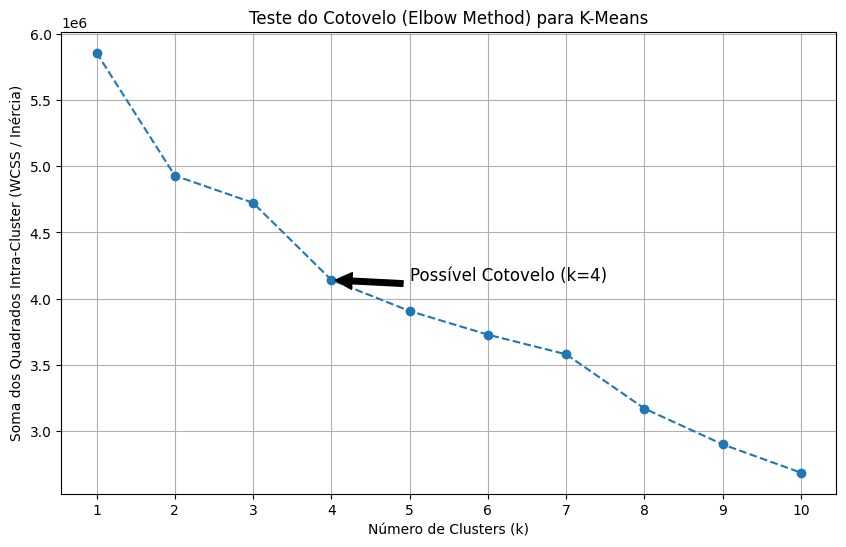

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs # Ótimo para criar dados de exemplo para clustering

# ==============================================================================
# 1. PRÉ-PROCESSAMENTO: DICOTOMIZAR E PADRONIZAR
# ==============================================================================
print("\n--- 1. Iniciando Pré-processamento ---")

# Identificar colunas para cada tipo de transformação
# Nota: O método get_dummies é ideal para "dicotomizar" ou "one-hot encode"
cols_to_dummify = ['tcp','ftp_data','SF','normal','REJ','neptune','private'] # 'test
numeric_cols = df_kdd[[coluna for coluna in df_kdd.columns if coluna not in cols_to_dummify]].columns

# Aplicando pd.get_dummies para as colunas categóricas
df_dummified = pd.get_dummies(df_kdd[cols_to_dummify], prefix=cols_to_dummify)
print(f"Colunas categóricas transformadas em {df_dummified.shape[1]} colunas binárias.")

# Padronizando as colunas numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_kdd[numeric_cols]), columns=numeric_cols, index=df_kdd.index)
print("Colunas numéricas foram padronizadas (média 0, desvio padrão 1).")
imputer = SimpleImputer(strategy='mean')
df_scaled[numeric_cols] = imputer.fit_transform(df_scaled[numeric_cols])

# Juntando tudo em um DataFrame processado
df_processed = pd.concat([df_scaled, df_dummified], axis=1)

print("\nDimensões do DataFrame processado:", df_processed.shape)
print("Primeiras linhas do DataFrame processado:")
print(df_processed.head())
print("-" * 50)

# ==============================================================================
# 2. PCA (ANÁLISE DE COMPONENTES PRINCIPAIS)
# ==============================================================================
print("\n--- 2. Aplicando PCA ---")
# Vamos manter 95% da variância explicada
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(df_processed)

print(f"PCA concluído. Número original de features: {df_processed.shape[1]}")
print(f"Número de componentes principais (90% variância): {pca.n_components_}")
print("-" * 50)

# ==============================================================================
# 3. TESTE DO COTOVELO (ELBOW METHOD)
# ==============================================================================
print("\n--- Calculando a Inércia para diferentes valores de k ---")

inertia_values = []
k_range = range(1, 11) # Vamos testar de k=1 até k=10

for k in k_range:
    # Cria e treina o modelo K-Means para o valor de k atual
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++', # Método de inicialização inteligente
        n_init='auto',    # Define o número de inicializações automaticamente
        random_state=42
    )
    kmeans.fit(data_pca)

    # Adiciona o valor da inércia (WCSS) à nossa lista
    inertia_values.append(kmeans.inertia_)

# --- Plotando o Gráfico do Cotovelo ---
print("\n--- Gerando o Gráfico do Cotovelo ---")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')

# Anotações e títulos para clareza
plt.title('Teste do Cotovelo (Elbow Method) para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Intra-Cluster (WCSS / Inércia)')
plt.xticks(k_range)
plt.grid(True)

# Adicionando uma anotação para destacar o cotovelo
# (Ajuste as coordenadas xy e xytext conforme necessário para o seu gráfico)
plt.annotate('Possível Cotovelo (k=4)',
             xy=(4, inertia_values[3]),
             xytext=(5, inertia_values[3] + 150),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()

### Pipeline

In [ ]:
# ==============================================================================
# 1. PRÉ-PROCESSAMENTO: DICOTOMIZAR E PADRONIZAR
# ==============================================================================
print("\n--- 1. Iniciando Pré-processamento ---")

# Identificar colunas para cada tipo de transformação
# Nota: O método get_dummies é ideal para "dicotomizar" ou "one-hot encode"
cols_to_dummify = ['tcp','ftp_data','SF','normal','REJ','neptune','private'] # 'test
numeric_cols = df_kdd[[coluna for coluna in df_kdd.columns if coluna not in cols_to_dummify]].columns

# Aplicando pd.get_dummies para as colunas categóricas
df_dummified = pd.get_dummies(df_kdd[cols_to_dummify], prefix=cols_to_dummify)
print(f"Colunas categóricas transformadas em {df_dummified.shape[1]} colunas binárias.")

# Padronizando as colunas numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_kdd[numeric_cols]), columns=numeric_cols, index=df_kdd.index)
print("Colunas numéricas foram padronizadas (média 0, desvio padrão 1).")
imputer = SimpleImputer(strategy='mean')
df_scaled[numeric_cols] = imputer.fit_transform(df_scaled[numeric_cols])

# Juntando tudo em um DataFrame processado
df_processed = pd.concat([df_scaled, df_dummified], axis=1)

print("\nDimensões do DataFrame processado:", df_processed.shape)
print("Primeiras linhas do DataFrame processado:")
print(df_processed.head())
print("-" * 50)




# ==============================================================================
# 2. PCA (ANÁLISE DE COMPONENTES PRINCIPAIS)
# ==============================================================================
print("\n--- 2. Aplicando PCA ---")
# Vamos manter 95% da variância explicada
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(df_processed)

print(f"PCA concluído. Número original de features: {df_processed.shape[1]}")
print(f"Número de componentes principais (95% variância): {pca.n_components_}")
print("-" * 50)


# ==============================================================================
# 3. K-MEANS CLUSTERING
# ==============================================================================
print("\n--- 3. Aplicando K-Means Clustering ---")
# O número de clusters (k) é um hiperparâmetro. Vamos usar k=3 como exemplo.
# Em um projeto real, você usaria o "método do cotovelo" para encontrar o k ideal.
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(data_pca)

# Adicionando os clusters a um DataFrame para análise (opcional, mas útil)
df_kdd['cluster_kmeans'] = clusters
print("K-Means executado e a coluna 'cluster_kmeans' foi adicionada ao DataFrame original.")
print("Distribuição dos dados nos clusters:")
print(df_kdd['cluster_kmeans'].value_counts())
print("-" * 50)


# ==============================================================================
# 4. DIVISÃO EM DADOS DE TREINO E TESTE
# ==============================================================================
# print("\n--- 4. Dividindo dados em Treino e Teste ---")
# # X: nossos dados após PCA
# X = data_pca
# # y: nosso alvo (1 para normal, 0 para anomalia)
# y = df_kdd['class']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.3, # 30% para teste
#     random_state=42,
#     stratify=y # Mantém a proporção de classes no treino e teste
# )
# print(f"Dados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.")
# print("-" * 50)

data_pca['test'] = df_kdd['test']

# ==============================================================================
# 5. RODANDO OS ALGORITMOS DE DETECÇÃO DE ANOMALIA
# 6. CALCULANDO AS MÉTRICAS
# ==============================================================================
print("\n--- 5 & 6. Treinando Modelos e Calculando Métricas ---")

# Função auxiliar para calcular e exibir as métricas
def evaluate_model(y_true, y_pred_raw, model_name):
    """
    Avalia o modelo, tratando a saída padrão dos algoritmos (-1=outlier, 1=inlier).
    Nosso alvo: 0=anomalia/outlier, 1=normal/inlier.
    """
    # Mapear predição: -1 (outlier) -> 0, 1 (inlier) -> 1
    y_pred = np.where(y_pred_raw == -1, 0, 1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n===== Resultados para: {model_name} =====")
    print(f"Acurácia Geral: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")

    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Anomalia (0)', 'Normal (1)'],
                yticklabels=['Anomalia (0)', 'Normal (1)'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# Definindo os modelos
# O parâmetro 'contamination' no IsolationForest pode ser ajustado
# com base no conhecimento prévio da proporção de anomalias.
# Usaremos 'auto' ou um valor padrão.
contamination_rate = 1 - y.mean() # Proporção de anomalias nos dados
models = {
    "Isolation Forest": IsolationForest(contamination=contamination_rate, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True),
    "One-Class SVM": OneClassSVM(kernel='rbf', gamma='auto', nu=contamination_rate)
}

# Treinando e avaliando cada modelo
for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train)
    predictions = model.predict(X_test)
    evaluate_model(y_test, predictions, name)

## Dataframe Credit Card Fraud

### Teste do cotovelo


--- 1. Iniciando Pré-processamento ---
Colunas numéricas foram padronizadas (média 0, desvio padrão 1).

Dimensões do DataFrame processado: (284807, 32)
Primeiras linhas do DataFrame processado:
         0         1         2         3         4         5         6   \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         7         8         9   ...        22        23        24        25  \
0  0.193679  0.082637  0.331128  ...  0.382854 -0.176911  0.110507  0.246585   
1 -0.063700  0.071253 -0.232494  ... -0.880077  0.162201 -0.561131  0.320694   
2  0.639776  0.207373 -1.378675  ...  1.063358  1.456320 -1.138092 -0.628537   
3  0.192071  0.316018 -1.262503  

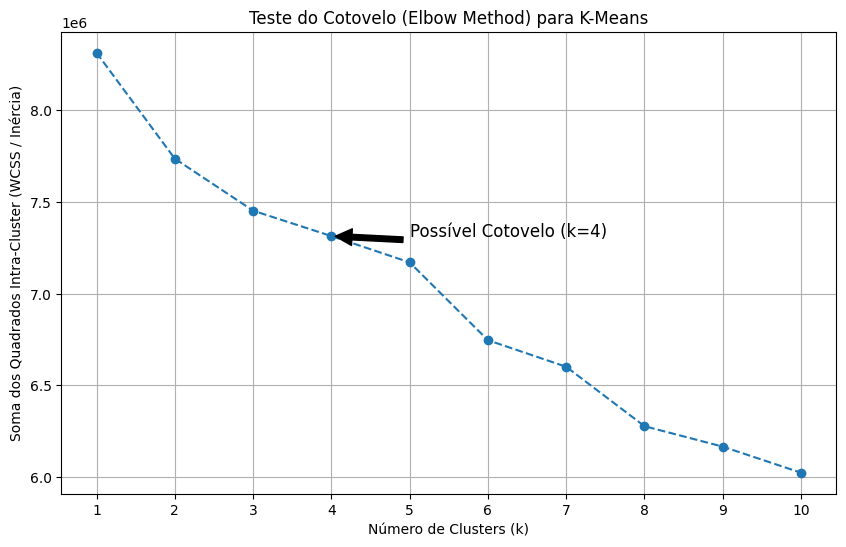

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs # Ótimo para criar dados de exemplo para clustering

# ==============================================================================
# 1. PRÉ-PROCESSAMENTO: DICOTOMIZAR E PADRONIZAR
# ==============================================================================
print("\n--- 1. Iniciando Pré-processamento ---")

# Padronizando as colunas numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print("Colunas numéricas foram padronizadas (média 0, desvio padrão 1).")
imputer = SimpleImputer(strategy='mean')
df_scaled[:] = imputer.fit_transform(df_scaled[:])

# Juntando tudo em um DataFrame processado
df_processed = pd.DataFrame(df_scaled)

print("\nDimensões do DataFrame processado:", df_processed.shape)
print("Primeiras linhas do DataFrame processado:")
print(df_processed.head())
print("-" * 50)

# ==============================================================================
# 2. PCA (ANÁLISE DE COMPONENTES PRINCIPAIS)
# ==============================================================================
print("\n--- 2. Aplicando PCA ---")
# Vamos manter 95% da variância explicada
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(df_processed)

print(f"PCA concluído. Número original de features: {df_processed.shape[1]}")
print(f"Número de componentes principais (90% variância): {pca.n_components_}")
print("-" * 50)

# ==============================================================================
# 3. TESTE DO COTOVELO (ELBOW METHOD)
# ==============================================================================
print("\n--- Calculando a Inércia para diferentes valores de k ---")

inertia_values = []
k_range = range(1, 11) # Vamos testar de k=1 até k=10

for k in k_range:
    # Cria e treina o modelo K-Means para o valor de k atual
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++', # Método de inicialização inteligente
        n_init='auto',    # Define o número de inicializações automaticamente
        random_state=42
    )
    kmeans.fit(data_pca)

    # Adiciona o valor da inércia (WCSS) à nossa lista
    inertia_values.append(kmeans.inertia_)

# --- Plotando o Gráfico do Cotovelo ---
print("\n--- Gerando o Gráfico do Cotovelo ---")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')

# Anotações e títulos para clareza
plt.title('Teste do Cotovelo (Elbow Method) para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Intra-Cluster (WCSS / Inércia)')
plt.xticks(k_range)
plt.grid(True)

# Adicionando uma anotação para destacar o cotovelo
# (Ajuste as coordenadas xy e xytext conforme necessário para o seu gráfico)
plt.annotate('Possível Cotovelo (k=4)',
             xy=(4, inertia_values[3]),
             xytext=(5, inertia_values[3] + 150),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()

### Pipeline


--- 1. Iniciando Pré-processamento ---
Colunas numéricas foram padronizadas (média 0, desvio padrão 1).

Dimensões do DataFrame processado: (284807, 31)
Primeiras linhas do DataFrame processado:
         0         1         2         3         4         5         6   \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         7         8         9   ...        21        22        23        24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  

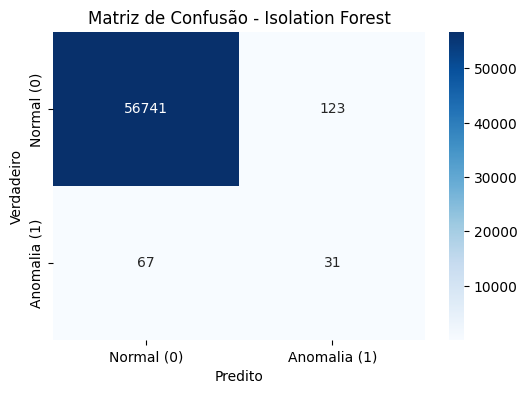

Treinando Local Outlier Factor...

===== Resultados para: Local Outlier Factor =====
Acurácia Geral: 0.9958
Precisão: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Matriz de Confusão:


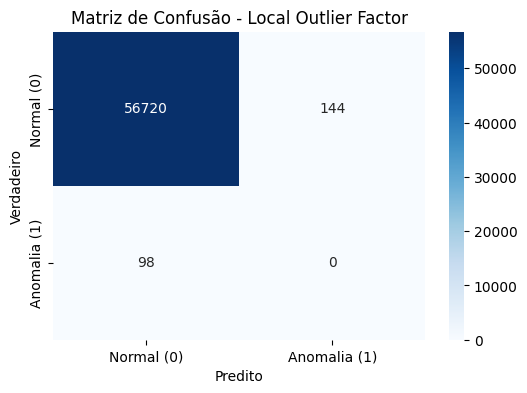

Treinando One-Class SVM...

===== Resultados para: One-Class SVM =====
Acurácia Geral: 0.9877
Precisão: 0.0652
Recall: 0.4592
F1-Score: 0.1142
Matriz de Confusão:


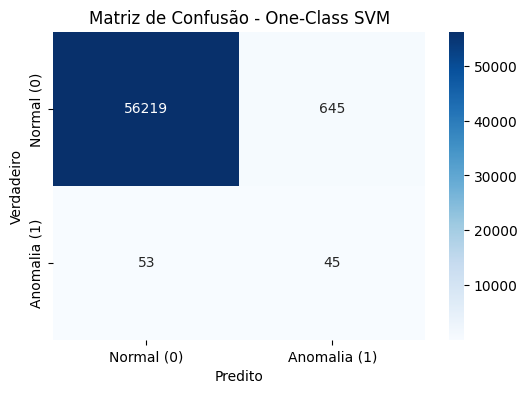

In [11]:
# ==============================================================================
# 1. PRÉ-PROCESSAMENTO: DICOTOMIZAR E PADRONIZAR
# ==============================================================================
print("\n--- 1. Iniciando Pré-processamento ---")

# Padronizando as colunas numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Class',axis=1))
print("Colunas numéricas foram padronizadas (média 0, desvio padrão 1).")
imputer = SimpleImputer(strategy='mean')
df_scaled[:] = imputer.fit_transform(df_scaled[:])

# Juntando tudo em um DataFrame processado
df_processed = pd.DataFrame(df_scaled)

print("\nDimensões do DataFrame processado:", df_processed.shape)
print("Primeiras linhas do DataFrame processado:")
print(df_processed.head())
print("-" * 50)

# ==============================================================================
# 2. PCA (ANÁLISE DE COMPONENTES PRINCIPAIS)
# ==============================================================================
print("\n--- 2. Aplicando PCA ---")
# Vamos manter 95% da variância explicada
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(df_processed)

print(f"PCA concluído. Número original de features: {df_processed.shape[1]}")
print(f"Número de componentes principais (90% variância): {pca.n_components_}")
print("-" * 50)

# ==============================================================================
# 3. K-MEANS CLUSTERING
# ==============================================================================
print("\n--- 3. Aplicando K-Means Clustering ---")
# O número de clusters (k) é um hiperparâmetro. Vamos usar k=3 como exemplo.
# Em um projeto real, você usaria o "método do cotovelo" para encontrar o k ideal.
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(data_pca)

# Adicionando os clusters a um DataFrame para análise (opcional, mas útil)
df['cluster_kmeans'] = clusters
print("K-Means executado e a coluna 'cluster_kmeans' foi adicionada ao DataFrame original.")
print("Distribuição dos dados nos clusters:")
print(df['cluster_kmeans'].value_counts())
print("-" * 50)

# ==============================================================================
# 4. DIVISÃO EM DADOS DE TREINO E TESTE
# ==============================================================================
print("\n--- 4. Dividindo dados em Treino e Teste ---")
# X: nossos dados após PCA
X = data_pca
# y: nosso alvo (1 para normal, 0 para anomalia)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Mantém a proporção de classes no treino e teste
)
print(f"Dados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.")
print("-" * 50)

# ==============================================================================
# 5. RODANDO OS ALGORITMOS DE DETECÇÃO DE ANOMALIA
# 6. CALCULANDO AS MÉTRICAS
# ==============================================================================
print("\n--- 5 & 6. Treinando Modelos e Calculando Métricas ---")

# Função auxiliar para calcular e exibir as métricas
def evaluate_model(y_true, y_pred_raw, model_name):
    """
    Avalia o modelo, tratando a saída padrão dos algoritmos (-1=outlier, 1=inlier).
    Nosso alvo: 0=anomalia/outlier, 1=normal/inlier.
    """
    # Mapear predição: -1 (outlier) -> 0, 1 (inlier) -> 1
    y_pred = np.where(y_pred_raw == -1, 1, 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n===== Resultados para: {model_name} =====")
    print(f"Acurácia Geral: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")

    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                yticklabels=['Normal (0)','Anomalia (1)'],
                xticklabels=['Normal (0)','Anomalia (1)'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# Definindo os modelos
# O parâmetro 'contamination' no IsolationForest pode ser ajustado
# com base no conhecimento prévio da proporção de anomalias.
# Usaremos 'auto' ou um valor padrão.
contamination_rate = 0.0025 # Proporção de anomalias nos dados
models = {
    "Isolation Forest": IsolationForest(contamination=contamination_rate, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True),
    "One-Class SVM": OneClassSVM(kernel='rbf', gamma='auto', nu=contamination_rate)
}

# Treinando e avaliando cada modelo
for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train)
    predictions = model.predict(X_test)
    evaluate_model(y_test, predictions, name)